## Book Recommemndation System

In [7]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Reading the datasets

In [9]:
# importing the datasets:
books_df = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines= False, encoding= 'latin-1')
users_df = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines= False, encoding= 'latin-1')
ratings_df = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines= False, encoding= 'latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [12]:
print(books_df.shape)
books_df.head()

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
print(users_df.shape)
users_df.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
print(ratings_df.shape)
ratings_df.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


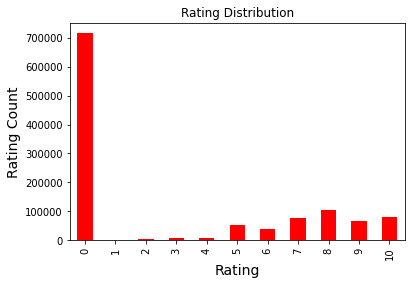

In [37]:
# Plotting the rating distribution:
plt.rc('font', size = 10)
ratings_df['Book-Rating'].value_counts(sort = False).sort_index(ascending = True).plot(kind = 'bar', color = 'REd')
plt.title('Rating Distribution')
plt.xlabel('Rating',size = 14)
plt.ylabel('Rating Count', size = 14)
plt.show()

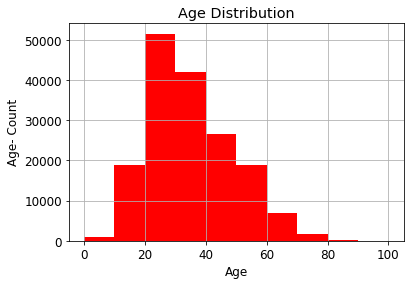

In [49]:
# Plotting the age distribution of the users those who rated the books:
plt.rc('font', size = 12)
users_df['Age'].hist(bins = [0,10,20,30,40,50,60,70,80,90,100], color = 'Red' )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Age- Count')
plt.show()

### <b> Recommendation Based On Rating Count

In [50]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [55]:
# Creating a rating dataframe grouped by ISBN and rating Count

rating_count  = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
rating_count = rating_count.sort_values('Book-Rating', ascending= False)
rating_count.head()

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


##### Hence the book with ISBN : '0971880107' got the most rating. Lets find out what book it is, and what books are in top 5.


In [60]:
most_rated_bboks = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'], index = np.arange(5), columns = ['ISBN'])
most_rated_book_summary = pd.merge(most_rated_bboks, books_df, on = 'ISBN')
most_rated_book_summary.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


## <b> Recommendation based on Correlation

##### We use Pearsons R correlation Coefficient to measure the linear correlation between two variables. In our case the rating for the two different books.

First, we need to find out the average rating and the number of ratings each book recieved :


In [66]:
average_rating = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
average_rating['Rating-Count'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
average_rating = average_rating.sort_values('Rating-Count', ascending = False)
average_rating.head()

,Book-Rating,Rating-Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


One thing to observe that the book which gets the most Rating Count is not highly rated. As a result, if we were to use reccommendation based on rating counts, we would definately make mistakes here. Hence we need to have a better system. 

<b> To ensure the validity of the recommendation system, we need to exclude the books which have less then 100 rating and users with less then 200 rating.

In [91]:
count1 = ratings_df['User-ID'].value_counts()
ratings= ratings_df[ratings_df['User-ID'].isin(count1[count1>=200].index)]
counts = ratings_df['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts>= 100].index)]

In [85]:
counts

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [92]:
# ratings.rename(columns = {'Book-Rating': 'book_rating'})
ratings

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


#### <b> Rating matrix

We convert the rating table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [95]:
rating_pivot = ratings.pivot_table(index= 'User-ID', columns= 'ISBN', values= 'Book-Rating')
userID = rating_pivot.index
ISBN = rating_pivot.columns
print(rating_pivot.shape)
rating_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lets take any ISBN no. As a book and try to corelate with all the books (ISBN).

In [113]:
bones_rating = rating_pivot['0312291639']
similar_to_bones = rating_pivot.corrwith(bones_rating)

In [114]:
corr_bones = pd.DataFrame(similar_to_bones, columns = ['pearsonR'])
corr_bones.dropna(inplace =True)
corr_summary = corr_bones.join(average_rating['Rating-Count'])
corr_summary = corr_summary[corr_summary['Rating-Count']>= 300].sort_values('pearsonR', ascending =False)


In [115]:
# This will be the recommendations for the particular ISBN number: 
corr_summary

,pearsonR,Rating-Count
ISBN,,
0312291639,1.000000,354
0312278586,0.790569,474
0671021001,0.603094,468
044651652X,0.602681,368
0452282829,0.590661,342
...,...,...
0804106304,-0.220551,519
0316284955,-0.247212,356
0060934417,-0.249987,350


#### We need to get the names of the book as ISBN is not enough.


In [116]:
final_recommendation_for_bones = pd.DataFrame.merge(corr_summary, books_df, on = 'ISBN')

In [118]:
final_recommendation_for_bones.head(5)

,ISBN,pearsonR,Rating-Count,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0312291639,1.000000,354,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0312278586,0.790569,474,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...
2,0671021001,0.603094,468,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...
3,044651652X,0.602681,368,The Bridges of Madison County,Robert James Waller,1992,Warner Books,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...
4,0452282829,0.590661,342,We Were the Mulvaneys,Joyce Carol Oates,1996,Plume,http://images.amazon.com/images/P/0452282829.0...,http://images.amazon.com/images/P/0452282829.0...,http://images.amazon.com/images/P/0452282829.0...


#### <b> Collaborative Filtering:

* KNN is a machie learning algorithm to find the clusters of similar users based book_rating and make predictions using the average rating of top k nearest neighbours. 

For example: we first present rating in a matrix having one or mare row for each item (book) and one column for each user. 

In [124]:
# MErging the two datasets 
combine_book_rating = pd.merge(ratings_df, books_df, on= 'ISBN')

In [125]:
# Droping irrlevent columns
combine_book_rating.head()
combine_book_rating= combine_book_rating.drop(['Book-Author','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'], axis= 1)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [127]:
# WE then group by books titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis= 0, subset= ['Book-Title'])

book_rating_count = combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns= {'Book-Rating': 'total_rating_count'})[['Book-Title','total_rating_count']]

book_rating_count.head()


,Book-Title,total_rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [128]:
# Combining total rating count with original dataset:

combine_book_rating_totalrating = combine_book_rating.merge(book_rating_count, on = 'Book-Title')
combine_book_rating_totalrating.head() 

,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [129]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)

print(book_rating_count['total_rating_count'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: total_rating_count, dtype: float64


### The median book has been rated only once. Let's look at the top of the distribution.

In [133]:
print(book_rating_count['total_rating_count'].quantile(np.arange(.9, 1,0.01)))


0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: total_rating_count, dtype: float64


In [136]:
threshold = 50

rating_popularity_books = combine_book_rating_totalrating.query('total_rating_count >= @threshold')
rating_popularity_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


## <b> Filter to users in US and Canada only

In [138]:
combined = rating_popularity_books.merge(users_df, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


In [139]:
us_canada_user_rating.shape

(251615, 6)

### <b>Implementing kNN

* We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

* Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [140]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [141]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1086


In [142]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [143]:
us_canada_user_rating_pivot.index[query_index]

'Me: Stories of My Life'

In [144]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Me: Stories of My Life:

1: Women in His Life, with distance of 0.8503738063639688:
2: M Is for Malice, with distance of 0.8607321076988002:
3: L Is for Lawless, with distance of 0.8660127336265933:
4: A Night to Remember, with distance of 0.8719409151414155:
5: Comeback, with distance of 0.8728399787246303:
